# Assignment 2 - Fish Prices

---
This notebook shows all the step used to answer questions of assignment 2 from [Econometrics](https://edu.epfl.ch/coursebook/fr/econometrics-FIN-403) courses.

**Author**: [Paulo Ribeiro](https://people.epfl.ch/paulo.ribeirodecarvalho)

---

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

## Load data

In [2]:
file_path = "fish.csv"
fish = pd.read_csv(file_path)
display(fish)

,avgprc,lavgprc,totqty,ltotqty,speed2,speed3,wave2,wave3,mon,tues,wed,thurs,t
0,0.700286,-0.356266,4080,8.313852,15,20,7.5,9.0,1,0,0,0,1
1,1.005336,0.005322,3466,8.150757,10,20,5.0,7.5,0,0,1,0,2
2,1.393918,0.332118,2295,7.738488,10,20,6.0,4.0,0,0,0,1,3
3,1.775487,0.574075,1870,7.533694,15,20,6.0,5.0,0,0,0,0,4
4,0.826799,-0.190194,6885,8.837100,10,20,3.5,3.5,1,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.429408,-0.845347,3450,8.146130,15,15,4.5,3.5,1,0,0,0,93
93,0.907724,-0.096815,1230,7.114770,12,25,4.5,4.0,0,1,0,0,94
94,1.238571,0.213958,1250,7.130899,12,25,5.0,4.5,0,0,1,0,95
95,1.250000,0.223144,3980,8.289037,15,18,6.0,4.5,0,0,0,1,96


## Part 1

For the first few questions, we use the variable `lavgprc` (= the log of the average price for fish) as the dependent variable.

### a)

In [3]:
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['mon', 'tues', 'wed', 'thurs', 't']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.701
Date:                Tue, 21 Nov 2023   Prob (F-statistic):              0.142
Time:                        19:52:59   Log-Likelihood:                -45.022
No. Observations:                  97   AIC:                             102.0
Df Residuals:                      91   BIC:                             117.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0730      0.115     -0.633      0.5

***Answer:*** Statistically no evidence that price varies within a week. Indeed, p-values of week-day variables are all bigger than the 5% significance level.

### b)

In [4]:
# Define the variables
y = fish['lavgprc']  # Dependent variable
X = fish[['mon', 'tues', 'wed', 'thurs', 't', 'wave2', 'wave3']]  # Independent variables

# Add a constant term for the intercept
X = sm.add_constant(X)

# Perform the regression
model_with_wave = sm.OLS(y, X).fit()

# Display the regression results
print(model_with_wave.summary())

                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     5.699
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           1.84e-05
Time:                        19:53:00   Log-Likelihood:                -31.396
No. Observations:                  97   AIC:                             78.79
Df Residuals:                      89   BIC:                             99.39
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9203      0.190     -4.848      0.0

In [5]:
# Let's see if wave2 and wave3 are jointly significant
f_test = model_with_wave.compare_f_test(model)

# Print the results
print(f"F-statistic : {f_test[0]:.3f}")
print(f"p-value : {f_test[1]:.3f}")

F-statistic : 14.436
p-value : 0.000


***Answer:*** From previous results, we see that variable `wave2` and `wave3` are individually and jointly statically significant at a $5\%$ significance level.

### c)

In [6]:
# Print the description of the regression for 't' in the restricted model
print(f"Model 1 (restricted), regression results for 't':")
print(f"Coefficient: {model.params['t']:.4f}")
print(f"P-value: {model.pvalues['t']:.4f}\n")

# Print the description of the regression for 't' in the not restricted model
print(f"Model 2 (not restricted), regression results for 't':")
print(f"Coefficient: {model_with_wave.params['t']:.4f}")
print(f"P-value: {model_with_wave.pvalues['t']:.4f}")

Model 1 (restricted), regression results for 't':
Coefficient: -0.0040
P-value: 0.0069

Model 2 (not restricted), regression results for 't':
Coefficient: -0.0012
P-value: 0.4075


***Answer:*** Indeed, the time trend variable `t` was firstly statistically relevant and became not relevant with the addition of the `wave2` and `wave3` variables. We are observing a situation known as the Omitted Variable Bias (c.f. Ch3 slide 37).

### d)

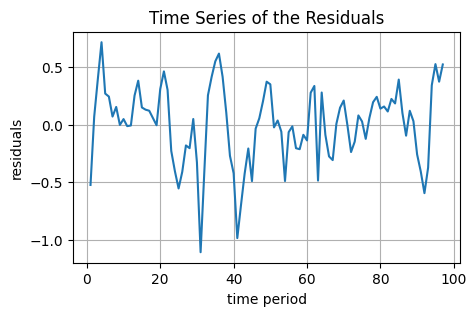

In [7]:
# Retrieve residuals of model from b)
residuals = model_with_wave.resid

# Initialize the figure to see the evolution
fig = plt.figure(figsize=(5,3))

# Plot the residuals in function of the time variable
plt.plot(fish['t'], residuals)
plt.xlabel('time period')
plt.ylabel('residuals')
plt.title('Time Series of the Residuals')
plt.grid()

plt.show()

***Answer:*** Just by looking at the plot, we cannot really say if the residuals are serially correlated. Let's dig a bit more in it by testing for AR(1) more formally with Durbin-Watson tests (c.f. Ch.4b) slide 12). Also we could check for higher auto correlation with the Breusch-Godfrey test (c.f. Ch.4b) slide 11), but not requested by the assignment.

In [8]:
# Perform the Durbin-Watson test
durbin_watson_statistic = sm.stats.stattools.durbin_watson(residuals)

# Print the results of Durbin-Watson statistic
print(f'Durbin-Watson Statistic: {durbin_watson_statistic:.3f}')

Durbin-Watson Statistic: 0.745


***Answer (cont'd):*** By looking at the lecture of chapter 4b) slide 13 we retrieve the approximate values of $d_L\approx1.506$ and $d_U\approx1.850$ (we choose $K=8\approx9$ and $T=97\approx100$ to retrieve these critical values). Since the statistic value of Durbin-Watson test is less than $d_U$, we reject the null stating $\rho=0$. We can statistically be confident that it exists a positive auto correlation at a $5\%$ significance level.

### e)

In [9]:
# Obtain Newey-West standard errors with four lags
newey_west_results = model_with_wave.get_robustcov_results(cov_type='HAC', maxlags=4)

results_data = pd.DataFrame(
    {
    'Coefficient': newey_west_results.params,
    'Standard Error': newey_west_results.bse,
    'F-Statistic': newey_west_results.fvalue,
    'P-value': newey_west_results.pvalues
}
, index=X.columns)

results_data

,Coefficient,Standard Error,F-Statistic,P-value
const,-0.920254,0.250645,10.386667,0.000411
mon,-0.018158,0.095637,10.386667,0.849849
tues,-0.008533,0.107378,10.386667,0.936839
wed,0.050041,0.094109,10.386667,0.596237
thurs,0.122546,0.064364,10.386667,0.060149
t,-0.001157,0.001919,10.386667,0.548031
wave2,0.090891,0.022388,10.386667,0.000105
wave3,0.047375,0.018676,10.386667,0.012933


***Answer:*** Both variables `wave2` and `wave3` seem to have p-values equal or smaller than the ones at step $b)$. Then, we can be as much or even more confident in the fact that their impact are statistically significant on the `lavgprc` variable.

### f)

In [10]:
# First let's compute rho
residuals = model_with_wave.resid
residuals_shifted = residuals.shift(periods=-1,
                                    fill_value=residuals.iloc[-1])  #give the last value of residuals

# Perform the regression
residuals_model = sm.OLS(residuals, residuals_shifted).fit()

# Retrieve rho
rho = residuals_model.params

#TODO: Ochrane and Prais computation